In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, average_precision_score, f1_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
#from sklearn.externals import joblib
from xgboost import XGBClassifier, XGBRegressor
import collections


ex_name = '13_1_mlp_4.txt'
ppl = [0.8, 0.9]# predict_proba_limits
folder_name = 'ml_threads/'
f_name = folder_name + ex_name

par = {}
parts = 10
parts4 = 100
par['pressure_time'] = {'Min': 0.0, 'Max': 100.0}
par['pressure_radius'] = {'Min': 0.0, 'Max': 5.0}
par['pressure_amplitude'] = {'Min': 0.0, 'Max': 200.0}
par['length'] = {'Min': 10.0, 'Max': 100.0}
par['diameter'] = {'Min': 0.01, 'Max': 0.5}
par['young'] = {'Min': 60.0, 'Max': 300.0}
par['density'] = {'Min': 1000.0, 'Max': 2000.0}
par['strength'] = {'Min': 0.2, 'Max': 10.0}
order_par = ['length', 'diameter', 'young', 'density', 'pressure_time', 'pressure_radius', 'pressure_amplitude', 'strength']

def get_list(Min, Max):
    return list(map(lambda x: round(x, 2), np.arange(Min, Max+0.01, (Max-Min)/(parts-1))))

def get_list4(Min, Max):
    return list(map(lambda x: round(x, 4), np.arange(Min, Max+0.01, (Max-Min)/(parts4-1))))

def get_raw(par_inxs):
    return [get_list4(**par[par_name])[par_inxs[pi]] for pi, par_name in enumerate(order_par)]

#print(get_list(**{'Min': 0, 'Max': 1}))

e0 = tuple(enumerate(get_list(**par['length'])))
e1 = tuple(enumerate(get_list(**par['diameter'])))
e2 = tuple(enumerate(get_list(**par['young'])))
e3 = tuple(enumerate(get_list(**par['density'])))
e4 = tuple(enumerate(get_list(**par['pressure_time'])))
e5 = tuple(enumerate(get_list(**par['pressure_radius'])))
e6 = tuple(enumerate(get_list(**par['pressure_amplitude'])))
e7 = tuple(enumerate(get_list(**par['strength'])))



extreme_values = [[
        par['length']['Min'],
        par['diameter']['Min'],
        par['young']['Min'],
        par['density']['Min'],
        par['pressure_time']['Min'],#get_list(**par['pressure_time'])[1],
        par['pressure_radius']['Min'],#get_list(**par['pressure_radius'])[1],
        par['pressure_amplitude']['Min'],#get_list(**par['pressure_amplitude'])[1],
        par['strength']['Min'],
        ],
        [
        par['length']['Max'],
        par['diameter']['Max'],
        par['young']['Max'],
        par['density']['Max'],
        par['pressure_time']['Max'],
        par['pressure_radius']['Max'],
        par['pressure_amplitude']['Max'],
        par['strength']['Max'],
        ]
    ]
extreme_values = np.array(extreme_values)
#x_train = (x_train - extreme_values.min(axis=0)) / (extreme_values.max(axis=0) - extreme_values.min(axis=0))


with open('../15/data3k_2.txt', 'r') as f:
    data_is_broken = f.readlines()
data_is_broken = list(map(int, data_is_broken))

y_test = []
for i, val in enumerate(data_is_broken):
    y_test.extend([i%2]*val)


new_parts = 19
def get_new_list(Min, Max):
    return list(map(lambda x: round(x, 2), np.arange(Min, Max+0.01, (Max-Min)/(new_parts-1))))[1::2]

e2_0 = tuple(enumerate(get_new_list(**par['length'])))
e2_1 = tuple(enumerate(get_new_list(**par['diameter'])))
e2_2 = tuple(enumerate(get_new_list(**par['young'])))
e2_3 = tuple(enumerate(get_new_list(**par['density'])))
e2_4 = tuple(enumerate(get_new_list(**par['pressure_time'])))
e2_5 = tuple(enumerate(get_new_list(**par['pressure_radius'])))
e2_6 = tuple(enumerate(get_new_list(**par['pressure_amplitude'])))
e2_7 = tuple(enumerate(get_new_list(**par['strength'])))

x_test = []
for i0, l in e2_0:
    for i1, di in e2_1:
        for i2, y in e2_2:
            for i3, de in e2_3:
                for i4, pt in e2_4:
                    for i5, pr in e2_5:
                        for i6, pa in e2_6:
                            for i7, s in e2_7:
                                #if 0 not in [i4, i5, i6]:
                                #print(l, di, y, de, pt, pr, pa, s)
                                x_test.append([l, di, y, de, pt, pr, pa, s])
    print(i0)
x_test, y_test = np.array(x_test), np.array(y_test)

x_test = (x_test - extreme_values.min(axis=0)) / (extreme_values.max(axis=0) - extreme_values.min(axis=0))


def make_str(data):
    return ''.join(map(str, data))
def make_set(data):
    return {make_str(i) for i in data}

with open(f_name, 'r') as f:
    threads = f.readlines()

roc_metrics, pr_metrics, f1_metrics = [], [], []
roc_metric, pr_metric, f1_metric = [], [], []


0
1
2
3
4
5
6
7
8


In [2]:
cut = 500
print('\n\n\n', '#'*10, cut, '#'*10)

x_train, y_train = [], []
for t in threads[:cut]:
    tr = list(map(int, t.replace('\n', '').split(',')))
    x_train.append(tr[:-1])
    y_train.append(tr[-1])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.array(list(map(get_raw, x_train)))
x_train = (x_train - extreme_values.min(axis=0)) / (extreme_values.max(axis=0) - extreme_values.min(axis=0))
model = MLPClassifier(activation='tanh', solver='adam', hidden_layer_sizes=(70, 70, 70), max_iter=100000, random_state=42)
print('\n', '-'*10, model.__class__.__name__, '-'*10)
print(x_test.shape, y_test.shape)
print('y_test', dict(collections.Counter(y_test)), 'y_train', dict(collections.Counter(y_train)))
# fit model on training data
model.fit(x_train, y_train)




 ########## 500 ##########

 ---------- MLPClassifier ----------
(43046721, 8) (43046721,)
y_test {1: 33300144, 0: 9746577} y_train {1: 215, 0: 285}


MLPClassifier(activation='tanh', hidden_layer_sizes=(70, 70, 70),
              max_iter=100000, random_state=42)

In [3]:
y_pred = model.predict(x_test[:10000000])
y_pred = np.concatenate((y_pred, model.predict(x_test[10000000:20000000])))
y_pred = np.concatenate((y_pred, model.predict(x_test[20000000:30000000])))
y_pred = np.concatenate((y_pred, model.predict(x_test[30000000:40000000])))
y_pred = np.concatenate((y_pred, model.predict(x_test[40000000:])))


y_pred_proba = model.predict_proba(x_test[:10000000])
y_pred_proba = np.concatenate((y_pred_proba, model.predict_proba(x_test[10000000:20000000])))
y_pred_proba = np.concatenate((y_pred_proba, model.predict_proba(x_test[20000000:30000000])))
y_pred_proba = np.concatenate((y_pred_proba, model.predict_proba(x_test[30000000:40000000])))
y_pred_proba = np.concatenate((y_pred_proba, model.predict_proba(x_test[40000000:])))
y_pred_proba = y_pred_proba[:, 0]

In [5]:
y_tail = y_pred_proba[y_test != y_pred]

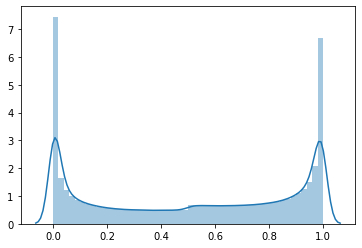

In [6]:
sns.distplot(y_tail)

In [8]:
import pandas as pd

In [9]:
y_series = pd.Series(y_tail)
y_series.describe()

count    2.329085e+06
mean     5.169188e-01
std      3.762168e-01
min      2.548642e-09
25%      1.080329e-01
50%      5.577387e-01
75%      9.022744e-01
max      1.000000e+00
dtype: float64

count    4.071764e+07
mean     2.153574e-01
std      3.976988e-01
min      2.220446e-16
25%      5.455095e-10
50%      6.876987e-07
75%      5.256170e-02
max      1.000000e+00
dtype: float64

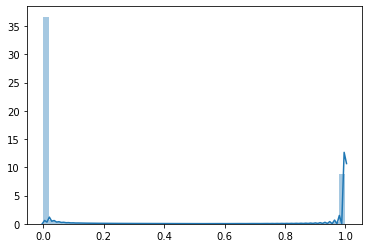

In [11]:
y_main = y_pred_proba[y_test == y_pred]
sns.distplot(y_main)
y_main_series = pd.Series(y_main)
y_main_series.describe()